In [1]:
import os
os.getcwd()
if os.getcwd() == 'd:\\TITO\\Documents\\Deep-learning\\eco-bag-detection\\models\\research':
    print('Already in directory')
else:
    os.chdir('models/research')

In [2]:
!for /f %i in ('dir /b object_detection\protos\*.proto') do protoc object_detection\protos\%i --python_out=.


(tf) d:\TITO\Documents\Deep-learning\eco-bag-detection\models\research>protoc object_detection\protos\anchor_generator.proto --python_out=. 

(tf) d:\TITO\Documents\Deep-learning\eco-bag-detection\models\research>protoc object_detection\protos\argmax_matcher.proto --python_out=. 

(tf) d:\TITO\Documents\Deep-learning\eco-bag-detection\models\research>protoc object_detection\protos\bipartite_matcher.proto --python_out=. 

(tf) d:\TITO\Documents\Deep-learning\eco-bag-detection\models\research>protoc object_detection\protos\box_coder.proto --python_out=. 

(tf) d:\TITO\Documents\Deep-learning\eco-bag-detection\models\research>protoc object_detection\protos\box_predictor.proto --python_out=. 

(tf) d:\TITO\Documents\Deep-learning\eco-bag-detection\models\research>protoc object_detection\protos\calibration.proto --python_out=. 

(tf) d:\TITO\Documents\Deep-learning\eco-bag-detection\models\research>protoc object_detection\protos\center_net.proto --python_out=. 

(tf) d:\TITO\Documents\Deep

In [8]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import zipfile
import io
import scipy.misc
import numpy as np

import glob
import imageio
from six import BytesIO
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

In [4]:
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils  import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [5]:
def load_image_into_numpy_array(path):
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    
    image_np_with_annotations = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=False,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:
        plt.imshow(image_np_with_annotations)

In [39]:
%matplotlib inline

train_image_dir = 'D:\\TITO\\Documents\\Deep-learning\\eco-bag-detection\\dataset\\train'

train_images_np = []
gt_boxes = []

# Get the list of files in the train_image_dir directory
file_list = os.listdir(train_image_dir)

for i, file_name in enumerate(file_list):
    image_path = os.path.join(train_image_dir, file_name)
    if not file_name.endswith('.xml'):
        # load images into numpy arrays and append to a list
        train_images_np.append(load_image_into_numpy_array(image_path))
        print("append image from ", file_name)
    if file_name.endswith('.xml'):
        xml_path = os.path.join(train_image_dir, file_name)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        gt_box = []
        
        for obj in root.findall('object'):
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            
            gt_box.append(np.array([[xmin, ymin, xmax, ymax]]))
            print("append from ", file_name)
        
        gt_boxes.append(gt_box)  # Append the list of bounding boxes to the main list
        print("append the coordinates of the bounding boxes to the main list")


append image from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.761b59e5fbae9a2ecbc158455e2b727e.jpg
append from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.761b59e5fbae9a2ecbc158455e2b727e.xml
append from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.761b59e5fbae9a2ecbc158455e2b727e.xml
append from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.761b59e5fbae9a2ecbc158455e2b727e.xml
append from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.761b59e5fbae9a2ecbc158455e2b727e.xml
append the coordinates of the bounding boxes to the main list
append image from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.d3d4aa054dc31f06f31a9f9bc8c9af24.jpg
append from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.d3d4aa054dc31f06f31a9f9bc8c9af24.xml
append from  1845126ThinkstockPhotos-147041313-reusable-bag780x390_jpg.rf.d3d4aa054dc31f06f31a9f9bc8c9af24.xml
append from  1845126ThinkstockPhotos-1

In [42]:
print(train_images_np[0])
print(gt_boxes[0])

[[[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [3 1 2]
  [1 0 0]
  [2 0 1]]

 [[0 0 0]
  [1 1 1]
  [1 1 1]
  ...
  [3 1 2]
  [1 0 0]
  [2 0 1]]

 [[0 0 0]
  [1 1 1]
  [3 3 3]
  ...
  [3 1 2]
  [1 0 0]
  [2 0 1]]

 ...

 [[0 3 0]
  [0 2 0]
  [0 0 7]
  ...
  [1 4 0]
  [2 5 0]
  [3 6 0]]

 [[0 3 0]
  [0 2 0]
  [0 0 7]
  ...
  [0 2 1]
  [2 4 3]
  [4 6 5]]

 [[0 3 0]
  [0 2 0]
  [0 0 7]
  ...
  [0 0 5]
  [0 0 5]
  [0 0 5]]]
[array([[  1,  58, 120, 334]]), array([[199,  55, 416, 416]]), array([[145,  89, 402, 416]]), array([[  1, 105, 200, 416]])]


In [43]:
eco_bag_id = 1

category_index = {eco_bag_id: {
    "id": eco_bag_id,
    "name": "Cloth-Bag"
}}

num_classes = 1

In [44]:
print(category_index[eco_bag_id])

{'id': 1, 'name': 'Cloth-Bag'}


In [46]:
label_id_offset = 1
train_image_tensors = []

gt_classes_one_hot_tensors = []
gt_box_tensors = []

for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
    
    train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(
        train_image_np, dtype=tf.float32), axis=0))
    
    gt_box_np = np.array(gt_box_np)
    gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
    
    zero_indexed_groundtruth_classes = tf.convert_to_tensor(
        np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) - label_id_offset)
    
    # do one-hot encoding to ground truth classes
    gt_classes_one_hot_tensors.append(tf.one_hot(
        zero_indexed_groundtruth_classes, num_classes))

print('Done prepping data.')

Done prepping data.


AttributeError: 'list' object has no attribute 'shape'

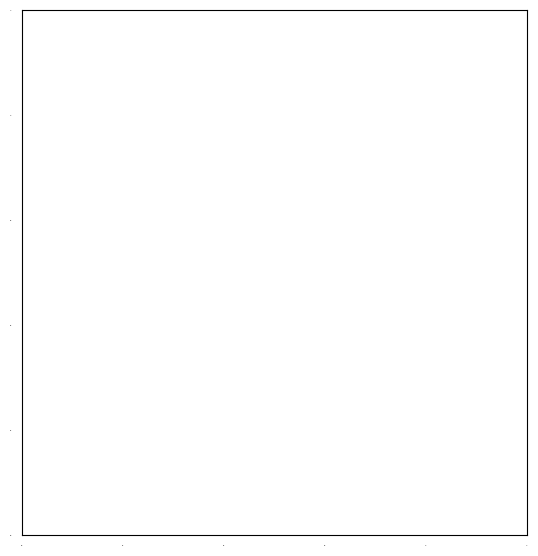

In [50]:
# give boxes a score of 100%
dummy_scores = np.array([1.0], dtype=np.float32)

# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(len(gt_boxes)):
    plt.subplot(2, 4, idx+1)
    plot_detections(
      train_images_np[idx],
      gt_boxes[idx],
      np.ones(shape=[gt_boxes[idx].shape[0]], dtype=np.int32),
      dummy_scores, category_index)

plt.show()

In [ ]:
# !curl -O http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
    
# # untar (decompress) the tar file
# !tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

# # copy the checkpoint to the test_data folder models/research/object_detection/test_data/
# !move ssd_resnet50_v1_fpn_640x640_coco17_tpu-8\checkpoint models\research\object_detection\test_data\


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  233M    0 19945    0     0  32555      0  2:05:20 --:--:--  2:05:20 32589
  0  233M    0  705k    0     0   457k      0  0:08:42  0:00:01  0:08:41  458k
  2  233M    2 4985k    0     0  1964k      0  0:02:01  0:00:02  0:01:59 1965k
  3  233M    3 8501k    0     0  2402k      0  0:01:39  0:00:03  0:01:36 2402k
  5  233M    5 11.7M    0     0  2645k      0  0:01:30  0:00:04  0:01:26 2646k
  6  233M    6 15.1M    0     0  2802k      0  0:01:25  0:00:05  0:01:20 3146k
  7  233M    7 18.5M    0     0  2909k      0  0:01:22  0:00:06  0:01:16 3665k
  9  233M    9 22.0M    0     0  2989k      0  0:01:19  0:00:07  0:01:12 3509k
 10  233M   10 25.4M    0     0  3049k      0  0:01:18  0:00:08  0:01:10 3506k
 12  233M   12 28.8M    0     0  3099k      0  0:01

        0 dir(s) moved.


The system cannot find the path specified.


In [ ]:
tf.keras.backend.clear_session()


### START CODE HERE ###
# define the path to the .config file for ssd resnet 50 v1 640x640
pipeline_config = "./object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config"

# Load the configuration file into a dictionary
configs = config_util.get_configs_from_pipeline_file(pipeline_config)

### END CODE HERE ###
# See what configs looks like
configs

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_resnet50_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 0.00039999998989515007
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5


In [ ]:
### START CODE HERE ###
# Read in the object stored at the key 'model' of the configs dictionary
model_config = configs["model"]

### END CODE HERE
# see what model_config looks like
model_config

ssd {
  num_classes: 90
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_resnet50_v1_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 0.00039999998989515007
        }
      }
      initializer {
        truncated_normal_initializer {
          mean: 0.0
          stddev: 0.029999999329447746
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
      unmatched_threshold: 0.5
      ignore_thresholds: f

In [ ]:
### START CODE HERE ###
# Modify the number of classes from its default of 90
model_config.ssd.num_classes = num_classes

# Freeze batch normalization
model_config.ssd.freeze_batchnorm = True

### END CODE HERE

# See what model_config now looks like after you've customized it!
model_config

ssd {
  num_classes: 1
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_resnet50_v1_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 0.00039999998989515007
        }
      }
      initializer {
        truncated_normal_initializer {
          mean: 0.0
          stddev: 0.029999999329447746
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
      unmatched_threshold: 0.5
      ignore_thresholds: fa

In [ ]:
### START CODE HERE (Replace instances of `None` with your code) ###
detection_model = model_builder.build(
    model_config, is_training= True
)
### END CODE HERE ###

print(type(detection_model))

<class 'object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch'>


In [ ]:
detection_model

In [ ]:
vars(detection_model)

{'_self_setattr_tracking': True,
 '_obj_reference_counts_dict': ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping 1>: 1, <_ObjectIdentityWrapper wrapping DictWrapper({})>: 1, <_ObjectIdentityWrapper wrapping True>: 7, <_ObjectIdentityWrapper wrapping <object_detection.anchor_generators.multiscale_grid_anchor_generator.MultiscaleGridAnchorGenerator object at 0x0000021A3889B520>>: 1, <_ObjectIdentityWrapper wrapping <object_detection.predictors.convolutional_keras_box_predictor.WeightSharedConvolutionalBoxPredictor object at 0x0000021A41C90640>>: 1, <_ObjectIdentityWrapper wrapping <object_detection.box_coders.faster_rcnn_box_coder.FasterRcnnBoxCoder object at 0x0000021A384220A0>>: 1, <_ObjectIdentityWrapper wrapping <object_detection.models.ssd_resnet_v1_fpn_keras_feature_extractor.SSDResNet50V1FpnKerasFeatureExtractor object at 0x0000021A434401C0>>: 1, <_ObjectIdentityWrapper wrapping False>: 3, <_ObjectIdentityWrapper wrapping 'ResNet50V1_FPN'>: 1, <_ObjectIdentityWrapper wra

In [ ]:
tmp_box_predictor_checkpoint = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    #    (i.e., the classification head that we *will not* restore)
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
    
    
### END CODE HERE

In [ ]:
type(tmp_box_predictor_checkpoint)

tensorflow.python.checkpoint.checkpoint.Checkpoint

In [ ]:
vars(tmp_box_predictor_checkpoint)

{'_save_counter': None,
 '_save_assign_op': None,
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name=_base_tower_layers_for_heads, ref={'box_encodings': ListWrapper([]), 'class_predictions_with_background': ListWrapper([])}),
  TrackableReference(name=_box_prediction_head, ref=<object_detection.predictors.heads.keras_box_head.WeightSharedConvolutionalBoxHead object at 0x0000021A3889BDF0>)],
 '_self_unconditional_dependency_names': {'_base_tower_layers_for_heads': {'box_encodings': ListWrapper([]),
   'class_predictions_with_background': ListWrapper([])},
  '_box_prediction_head': <object_detection.predictors.heads.keras_box_head.WeightSharedConvolutionalBoxHead at 0x21a3889bdf0>},
 '_self_unconditional_deferred_dependencies': {},
 '_self_update_uid': -1,
 '_self_name_based_restores': set(),
 '_self_saveable_object_factories': {},
 '_base_tower_layers_for_heads': {'box_encodings': ListWrapper([]),
  'class_predictions_with_backgroun